# Options

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, date
import matplotlib.pyplot as plt

# Make plots inline
%matplotlib inline

# Formatting options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 82) 
pd.set_option('precision', 3)


# Options data from Yahoo!

In [8]:
# retrieve options from Yahoo for AAPL
#aapl_options = web.Options('AAPL', 'yahoo')

# data is not actually retrieved until explicitly requesting.
#aapl_options = aapl_options.get_all_data().reset_index()

In [10]:
# save to a snapshot for easy reuse / offline processing
#aapl_options.to_csv('aapl_options.csv')

In [16]:
# or, load snapshot
aapl_options = pd.read_csv('aapl_options.csv', 
                           parse_dates=['Expiry'])

In [20]:
import pandas as pd

# Example DataFrame 'aapl_options' for illustration
data = {
    'Expiry': ['2023-07-01', '2023-07-01', '2023-07-08', '2023-07-08'],
    'Strike': [150, 155, 150, 155],
    'Type': ['Call', 'Put', 'Call', 'Put'],
    'IV': ['20%', '18%', '22%', '19%'],
    'Bid': [1.2, 1.5, 1.0, 1.3],
    'Ask': [1.4, 1.7, 1.2, 1.5],
    'Underlying_Price': [145, 145, 145, 145]
}
aapl_options = pd.DataFrame(data)

# Restructure and tidy the data
aos = aapl_options.sort_values(['Expiry', 'Strike'])[
    ['Expiry', 'Strike', 'Type', 'IV', 'Bid', 'Ask', 'Underlying_Price']
]

# Convert 'IV' from string to float
aos['IV'] = aos['IV'].str.rstrip('%').astype('float')

# Display the tidied data
print(aos)

       Expiry  Strike  Type    IV  Bid  Ask  Underlying_Price
0  2023-07-01     150  Call  20.0  1.2  1.4               145
1  2023-07-01     155   Put  18.0  1.5  1.7               145
2  2023-07-08     150  Call  22.0  1.0  1.2               145
3  2023-07-08     155   Put  19.0  1.3  1.5               145


In [22]:
# take a peek at the options data
aos[:5]

       Expiry  Strike  Type    IV  Bid  Ask  Underlying_Price
0  2023-07-01     150  Call  20.0  1.2  1.4               145
1  2023-07-01     155   Put  18.0  1.5  1.7               145
2  2023-07-08     150  Call  22.0  1.0  1.2               145
3  2023-07-08     155   Put  19.0  1.3  1.5               145

In [24]:
# we have the following distinct dates for options available on AAPL
aos['Expiry'].unique()

array(['2023-07-01', '2023-07-08'], dtype=object)

In [31]:
import pandas as pd

# Example DataFrame 'aapl_options' for illustration
data = {
    'Expiry': ['2023-07-01', '2023-07-01', '2023-07-08', '2023-07-08'],
    'Strike': [150, 155, 150, 155],
    'Type': ['Call', 'Put', 'Call', 'Put'],
    'IV': ['20%', '18%', '22%', '19%'],
    'Bid': [1.2, 1.5, 1.0, 1.3],
    'Ask': [1.4, 1.7, 1.2, 1.5],
    'Underlying_Price': [145, 145, 145, 145]
}
aapl_options = pd.DataFrame(data)

# Restructure and tidy the data
aos = aapl_options.sort_values(['Expiry', 'Strike'])[
    ['Expiry', 'Strike', 'Type', 'IV', 'Bid', 'Ask', 'Underlying_Price']
]

# Convert 'IV' from string to float
aos['IV'] = aos['IV'].str.rstrip('%').astype('float')

# Filter for call options
call_options = aos[aos['Type'] == 'Call']

# Check for valid index and display the specific row
index = 158
if index in call_options.index:
    print(call_options.loc[index])
else:
    print(f"Index {index} not found in the DataFrame.")

Index 158 not found in the DataFrame.


## Implied volatility

In [34]:
# all calls on expiry date of 2015-02-27
calls1 = aos[(aos.Expiry=='2015-02-27') & (aos.Type=='call')]
calls1[:5]

Empty DataFrame
Columns: [Expiry, Strike, Type, IV, Bid, Ask, Underlying_Price]
Index: []

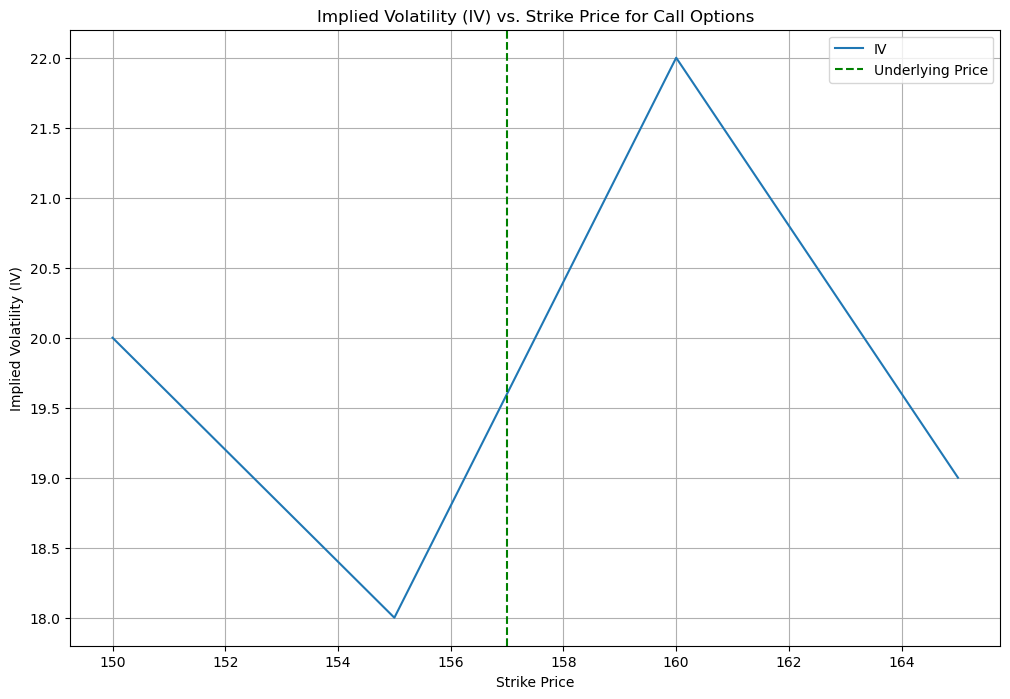

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame 'aapl_options' for illustration
data = {
    'Expiry': ['2015-02-27', '2015-02-27', '2015-02-27', '2015-02-27'],
    'Strike': [150, 155, 160, 165],
    'Type': ['call', 'call', 'call', 'call'],
    'IV': ['20%', '18%', '22%', '19%'],
    'Bid': [1.2, 1.5, 1.0, 1.3],
    'Ask': [1.4, 1.7, 1.2, 1.5],
    'Underlying_Price': [157, 157, 157, 157]
}
aapl_options = pd.DataFrame(data)

# Restructure and tidy the data
aos = aapl_options.sort_values(['Expiry', 'Strike'])[
    ['Expiry', 'Strike', 'Type', 'IV', 'Bid', 'Ask', 'Underlying_Price']
]

# Convert 'IV' from string to float
aos['IV'] = aos['IV'].str.rstrip('%').astype('float')

# Filter data for plotting
calls1 = aos[(aos.Expiry == '2015-02-27') & (aos.Type == 'call')]

# Plot the data
ax = calls1.set_index('Strike')[['IV']].plot(figsize=(12, 8))
ax.axvline(calls1.Underlying_Price.iloc[0], color='g', linestyle='--', label='Underlying Price')
ax.set_title('Implied Volatility (IV) vs. Strike Price for Call Options')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Implied Volatility (IV)')
plt.legend()
plt.grid(True)
plt.savefig('5104OS_08_01.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculating payoff on options

## Call option payoff calculation

In [42]:
def call_payoff(price_at_maturity, strike_price):
    return max(0, price_at_maturity - strike_price)

In [44]:
# out-of-the-money
call_payoff(25, 30)

0

In [46]:
# in-the-money
call_payoff(35, 30)

5

In [48]:
def call_payoffs(min_maturity_price, max_maturity_price, 
                 strike_price, step=1):
    """
    Calculate the payoffs for a range of maturity prices at 
    a given strike price
    """
    maturities = np.arange(min_maturity_price, 
                           max_maturity_price + step, step)
    payoffs = np.vectorize(call_payoff)(maturities, strike_price)
    df = pd.DataFrame({'Strike': strike_price, 'Payoff': payoffs}, 
                      index=maturities)
    df.index.name = 'Maturity Price'
    return df

In [50]:
# calculate call payoffs for...
call_payoffs(10, 25, 15)

                Strike  Payoff
Maturity Price                
10                  15       0
11                  15       0
12                  15       0
13                  15       0
14                  15       0
...                ...     ...
21                  15       6
22                  15       7
23                  15       8
24                  15       9
25                  15      10

[16 rows x 2 columns]

In [52]:
def plot_call_payoffs(min_maturity_price, max_maturity_price, 
                      strike_price, step=1):
    """
    Plot a canonical call option payoff graph
    """
    payoffs = call_payoffs(min_maturity_price, max_maturity_price, 
                           strike_price, step)
    plt.figure(figsize=(12,8))
    plt.ylim(payoffs.Payoff.min() - 10, payoffs.Payoff.max() + 10)
    plt.ylabel("Payoff")
    plt.xlabel("Maturity Price")
    plt.title('Payoff of call option, Strike={0}'
              .format(strike_price))
    plt.xlim(min_maturity_price, max_maturity_price)
    plt.plot(payoffs.index, payoffs.Payoff.values);

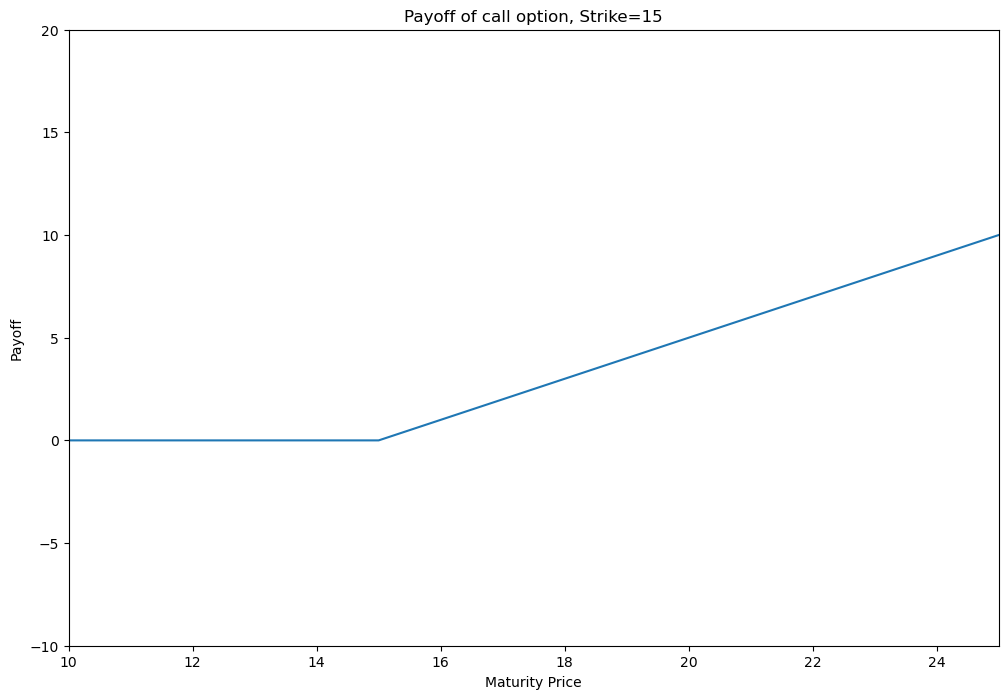

In [54]:
plot_call_payoffs(10, 25, 15)
#plt.savefig('5104OS_08_07.png', bbox_inches='tight', dpi=300)

## Put option payoff calculation

In [57]:
def put_payoff(price_at_maturity, strike_price):
    """
    return the put payoff
    """
    return max(0, strike_price - price_at_maturity)

In [59]:
# out-of-the-money
put_payoff(25, 20)

0

In [61]:
# in-the-money
put_payoff(15, 20)

5

In [63]:
def put_payoffs(min_maturity_price, max_maturity_price, 
                strike_price, step=1):
    """
    Calculate the payoffs for a range of maturity prices 
    at a given strike price
    """
    maturities = np.arange(min_maturity_price, 
                           max_maturity_price + step, step)
    payoffs = np.vectorize(put_payoff)(maturities, strike_price)
    df = pd.DataFrame({'Payoff': payoffs, 'Strike': strike_price},
                      index=maturities)
    df.index.name = 'Maturity Price'
    return df

In [65]:
# calculate call payoffs for 
put_payoffs(10, 25, 15)

                Payoff  Strike
Maturity Price                
10                   5      15
11                   4      15
12                   3      15
13                   2      15
14                   1      15
...                ...     ...
21                   0      15
22                   0      15
23                   0      15
24                   0      15
25                   0      15

[16 rows x 2 columns]

In [67]:
def plot_put_payoffs(min_maturity_price, 
                     max_maturity_price, 
                     strike_price, 
                     step=1):
    """
    Plot a canonical call option payoff graph
    """
    payoffs = put_payoffs(min_maturity_price, 
                          max_maturity_price, 
                          strike_price, step)
    plt.figure(figsize=(12,8))
    plt.ylim(payoffs.Payoff.min() - 10, payoffs.Payoff.max() + 10)
    plt.ylabel("Payoff")
    plt.xlabel("Maturity Price")
    plt.title('Payoff of put option, Strike={0}'
              .format(strike_price))
    plt.xlim(min_maturity_price, max_maturity_price)
    plt.plot(payoffs.index, payoffs.Payoff.values);

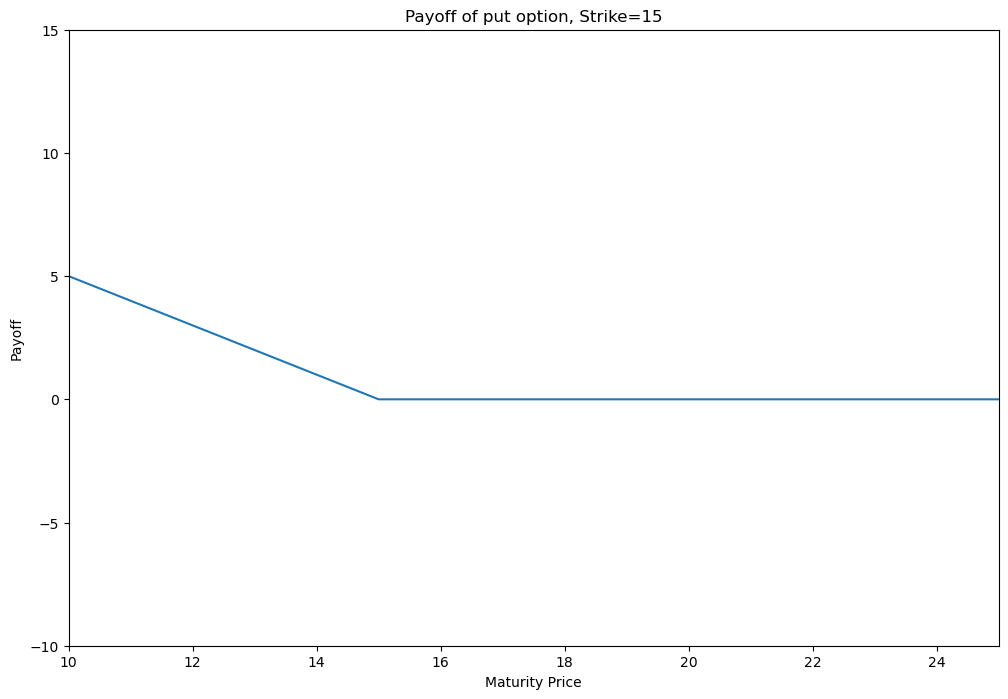

In [69]:
plot_put_payoffs(10, 25, 15)
#plt.savefig('5104OS_08_08.png', bbox_inches='tight', dpi=300)

# Profit and loss calculation

## Call option PnL for the Buyer

In [73]:
def call_pnl_buyer(premium, strike_price, min_maturity_price, 
                   max_maturity_price, step = 1):
    payoffs = call_payoffs(min_maturity_price, max_maturity_price, 
                           strike_price)
    payoffs['Premium'] = premium
    payoffs['PnL'] = payoffs.Payoff - premium
    return payoffs

In [75]:
pnl_buyer = call_pnl_buyer(12, 15, 10, 35)
pnl_buyer

                Strike  Payoff  Premium  PnL
Maturity Price                              
10                  15       0       12  -12
11                  15       0       12  -12
12                  15       0       12  -12
13                  15       0       12  -12
14                  15       0       12  -12
...                ...     ...      ...  ...
31                  15      16       12    4
32                  15      17       12    5
33                  15      18       12    6
34                  15      19       12    7
35                  15      20       12    8

[26 rows x 4 columns]

In [77]:
def plot_pnl(pnl_df, okind, who):
    plt.figure(figsize=(12,8))
    plt.ylim(pnl_df.Payoff.min() - 10, pnl_df.Payoff.max() + 10)
    plt.ylabel("Profit / Loss")
    plt.xlabel("Maturity Price")
    plt.title('Profit and loss of {0} option, {1}, Premium={2} Strike={3}'
              .format(okind, who, pnl_df.Premium.iloc[0], 
                      pnl_df.Strike.iloc[0]))
    plt.ylim(pnl_df.PnL.min()-3, pnl_df.PnL.max() + 3)
    plt.xlim(pnl_df.index[0], pnl_df.index[len(pnl_df.index)-1])
    plt.plot(pnl_df.index, pnl_df.PnL)
    plt.axhline(0, color='g');

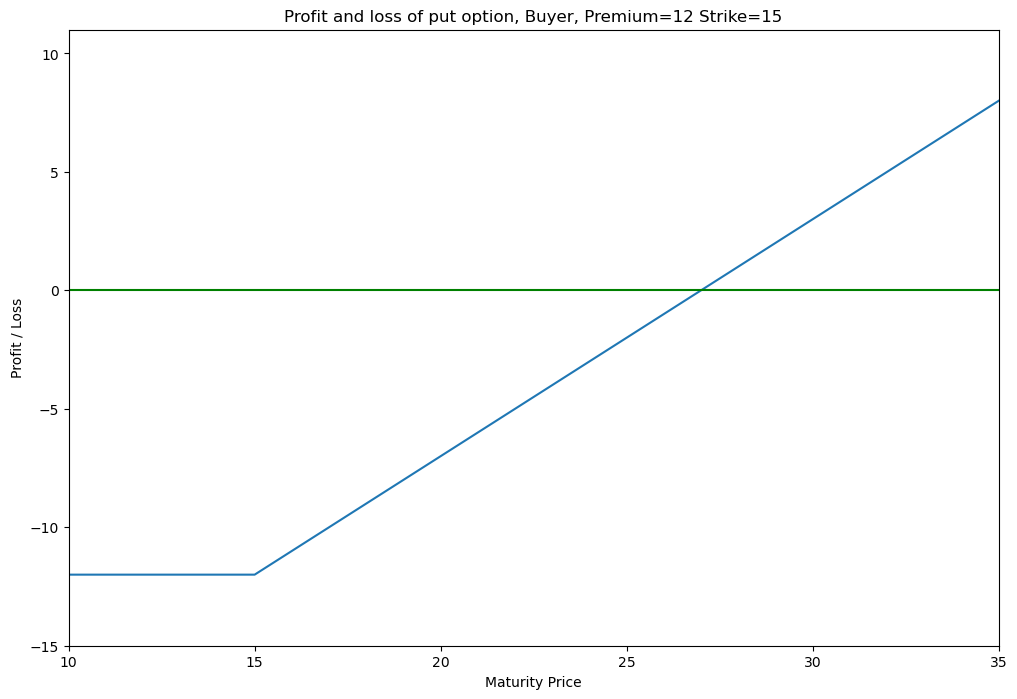

In [79]:
plot_pnl(pnl_buyer, "put", "Buyer")
#plt.savefig('5104OS_08_09.png', bbox_inches='tight', dpi=300)

## Call option Profit and Loss for the seller

In [82]:
def call_pnl_seller(premium, strike_price, min_maturity_price, 
                    max_maturity_price, step = 1):
    payoffs = call_payoffs(min_maturity_price, max_maturity_price, 
                           strike_price)
    payoffs['Premium'] = premium
    payoffs['PnL'] = premium - payoffs.Payoff
    return payoffs

In [84]:
pnl_seller = call_pnl_seller(12, 15, 10, 35)
pnl_seller

                Strike  Payoff  Premium  PnL
Maturity Price                              
10                  15       0       12   12
11                  15       0       12   12
12                  15       0       12   12
13                  15       0       12   12
14                  15       0       12   12
...                ...     ...      ...  ...
31                  15      16       12   -4
32                  15      17       12   -5
33                  15      18       12   -6
34                  15      19       12   -7
35                  15      20       12   -8

[26 rows x 4 columns]

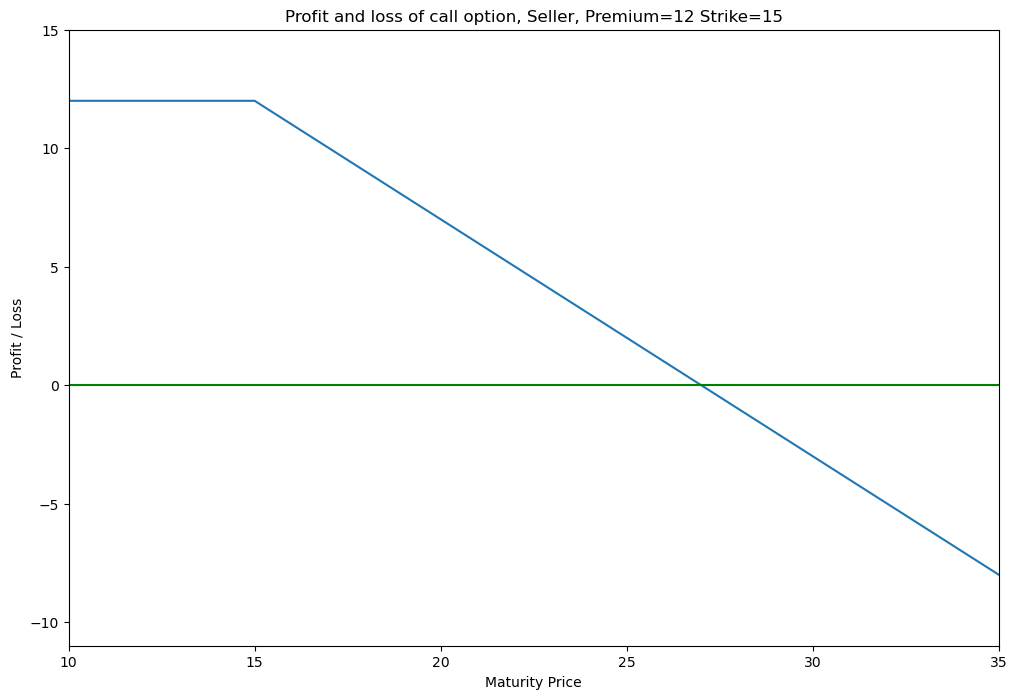

In [86]:
plot_pnl(pnl_seller, "call", "Seller")
#plt.savefig('5104OS_08_10.png', bbox_inches='tight', dpi=300)

In [88]:
def plot_combined_pnl(pnl_df):
    plt.figure(figsize=(12,8))
    plt.ylim(pnl_df.Payoff.min() - 10, pnl_df.Payoff.max() + 10)
    plt.ylabel("Profit / Loss")
    plt.xlabel("Maturity Price")
    plt.title('Profit and loss of call option Strike={0}'
              .format(pnl_df.Strike.iloc[0]))
    plt.ylim(min(pnl_df.PnLBuyer.min(), pnl_df.PnLSeller.min()) - 3, 
             max(pnl_df.PnLBuyer.max(), pnl_df.PnLSeller.max()) + 3)
    plt.xlim(pnl_df.index[0], pnl_df.index[len(pnl_df.index)-1])
    plt.plot(pnl_df.index, pnl_df.PnLBuyer, color='b')
    plt.plot(pnl_df.index, pnl_df.PnLSeller, color='r')
    plt.axhline(0, color='g');

In [90]:
pnl_combined = pd.DataFrame({'PnLBuyer': pnl_buyer.PnL,
                             'PnLSeller': pnl_seller.PnL,
                             'Premium': pnl_buyer.Premium,
                             'Strike': pnl_buyer.Strike,
                             'Payoff': pnl_buyer.Payoff})
pnl_combined

                PnLBuyer  PnLSeller  Premium  Strike  Payoff
Maturity Price                                              
10                   -12         12       12      15       0
11                   -12         12       12      15       0
12                   -12         12       12      15       0
13                   -12         12       12      15       0
14                   -12         12       12      15       0
...                  ...        ...      ...     ...     ...
31                     4         -4       12      15      16
32                     5         -5       12      15      17
33                     6         -6       12      15      18
34                     7         -7       12      15      19
35                     8         -8       12      15      20

[26 rows x 5 columns]

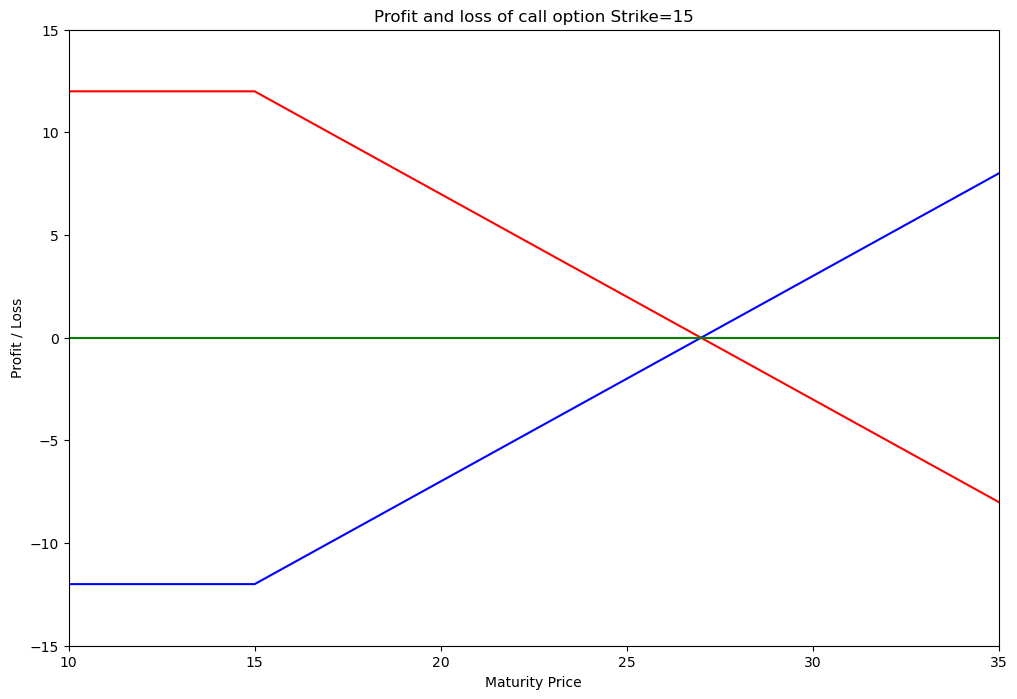

In [92]:
plot_combined_pnl(pnl_combined)
#plt.savefig('5104OS_08_11.png', bbox_inches='tight', dpi=300)

## Put option profit and loss for the Buyer

In [95]:
def put_pnl_buyer(premium, strike_price, min_maturity_price, 
                  max_maturity_price, step = 1):
    payoffs = put_payoffs(min_maturity_price, max_maturity_price, 
                          strike_price)
    payoffs['Premium'] = premium
    payoffs['Strike'] = strike_price
    payoffs['PnL'] = payoffs.Payoff - payoffs.Premium
    return payoffs

In [97]:
pnl_put_buyer = put_pnl_buyer(2, 15, 10, 30)
pnl_put_buyer

                Payoff  Strike  Premium  PnL
Maturity Price                              
10                   5      15        2    3
11                   4      15        2    2
12                   3      15        2    1
13                   2      15        2    0
14                   1      15        2   -1
...                ...     ...      ...  ...
26                   0      15        2   -2
27                   0      15        2   -2
28                   0      15        2   -2
29                   0      15        2   -2
30                   0      15        2   -2

[21 rows x 4 columns]

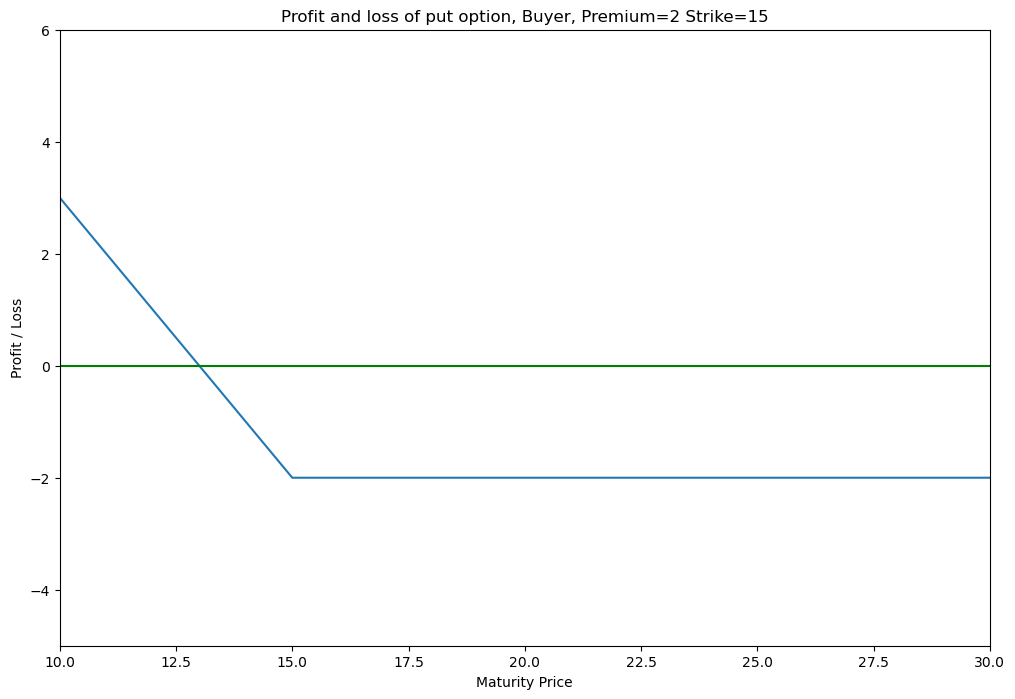

In [99]:
plot_pnl(pnl_put_buyer, "put", "Buyer")
#plt.savefig('5104OS_08_12.png', bbox_inches='tight', dpi=300)

## Put Option PnL for the Seller

In [102]:
def put_pnl_seller(premium, strike_price, min_maturity_price, 
                   max_maturity_price, step = 1):
    payoffs = put_payoffs(min_maturity_price, max_maturity_price, 
                          strike_price)
    payoffs['Premium'] = premium
    payoffs['Strike'] = strike_price
    payoffs['PnL'] = payoffs.Premium - payoffs.Payoff
    return payoffs

In [104]:
pnl_put_seller = put_pnl_seller(2, 15, 10, 30)
pnl_put_seller

                Payoff  Strike  Premium  PnL
Maturity Price                              
10                   5      15        2   -3
11                   4      15        2   -2
12                   3      15        2   -1
13                   2      15        2    0
14                   1      15        2    1
...                ...     ...      ...  ...
26                   0      15        2    2
27                   0      15        2    2
28                   0      15        2    2
29                   0      15        2    2
30                   0      15        2    2

[21 rows x 4 columns]

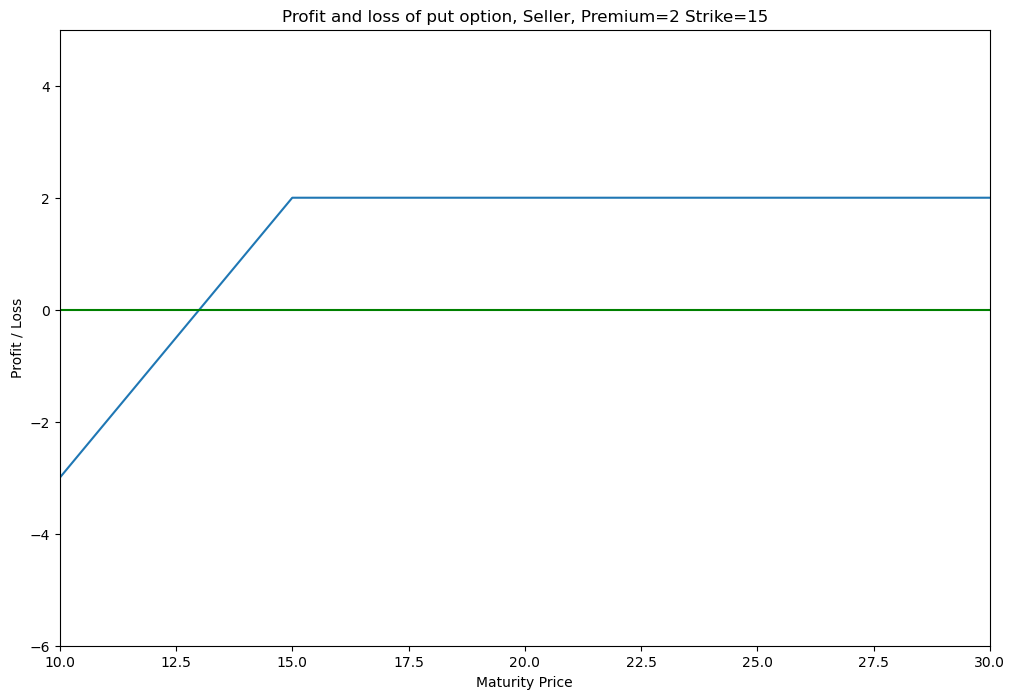

In [106]:
plot_pnl(pnl_put_seller, "put", "Seller")
#plt.savefig('5104OS_08_13.png', bbox_inches='tight', dpi=300)

# Black-Scholes using Mibian

In [119]:
aos[aos.Expiry=='2016-01-15'][:2]

Empty DataFrame
Columns: [Expiry, Strike, Type, IV, Bid, Ask, Underlying_Price]
Index: []

In [121]:
date(2016, 1, 15) - date(2015, 2, 25)

datetime.timedelta(days=324)

In [123]:
import mibian
c = mibian.BS([128.79, 34.29, 1, 324], 57.23)

In [125]:
c.callPrice

94.87897008945622

In [127]:
c.putPrice

0.0759345929965427

In [129]:
c = mibian.BS([128.79, 34.29, 1, 324], 
              callPrice=94.878970089456217 )
c.impliedVolatility

57.22999572753906

### Charting option price change over time

In [132]:
df = pd.DataFrame({'DaysToExpiry': np.arange(364, 0, -1)})
df

     DaysToExpiry
0             364
1             363
2             362
3             361
4             360
..            ...
359             5
360             4
361             3
362             2
363             1

[364 rows x 1 columns]

In [134]:
bs_v1 = mibian.BS([128.79, 34.29, 1, 324], volatility=57.23)
calc_call = lambda r: mibian.BS([128.79, 34.29, 1, 
                                 r.DaysToExpiry], 
                                volatility=57.23).callPrice
df['CallPrice'] = df.apply(calc_call, axis=1)
df

     DaysToExpiry  CallPrice
0             364     94.962
1             363     94.960
2             362     94.957
3             361     94.955
4             360     94.953
..            ...        ...
359             5     94.505
360             4     94.504
361             3     94.503
362             2     94.502
363             1     94.501

[364 rows x 2 columns]

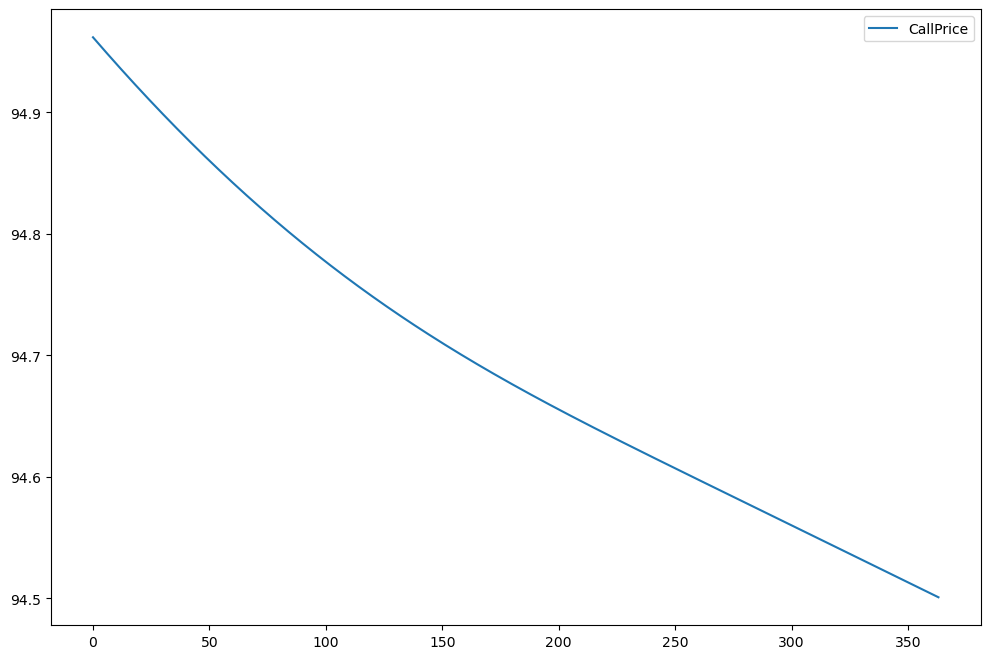

In [136]:
df[['CallPrice']].plot(figsize=(12,8));
#plt.savefig('5104OS_08_40.png', bbox_inches='tight', dpi=300)

## The Greeks

### Calculation and visualization

In [140]:
greeks = pd.DataFrame()
delta = lambda r: mibian.BS([r.Price, 60, 1, 180], 
                            volatility=30).callDelta
gamma = lambda r: mibian.BS([r.Price, 60, 1, 180], 
                            volatility=30).gamma
theta = lambda r: mibian.BS([r.Price, 60, 1, 180], 
                            volatility=30).callTheta
vega = lambda r: mibian.BS([r.Price, 60, 1, 365/12], 
                           volatility=30).vega

greeks['Price'] = np.arange(10, 70)
greeks['Delta'] = greeks.apply(delta, axis=1)
greeks['Gamma'] = greeks.apply(gamma, axis=1)
greeks['Theta'] = greeks.apply(theta, axis=1)
greeks['Vega'] = greeks.apply(vega, axis=1)
greeks[:5]

   Price      Delta      Gamma      Theta       Vega
0     10  2.735e-17  1.102e-16 -1.366e-18  3.851e-95
1     11  1.152e-15  4.001e-15 -6.003e-17  1.688e-85
2     12  2.940e-14  8.884e-14 -1.587e-15  3.719e-77
3     13  4.990e-13  1.324e-12 -2.776e-14  7.213e-70
4     14  6.050e-12  1.420e-11 -3.453e-13  1.882e-63

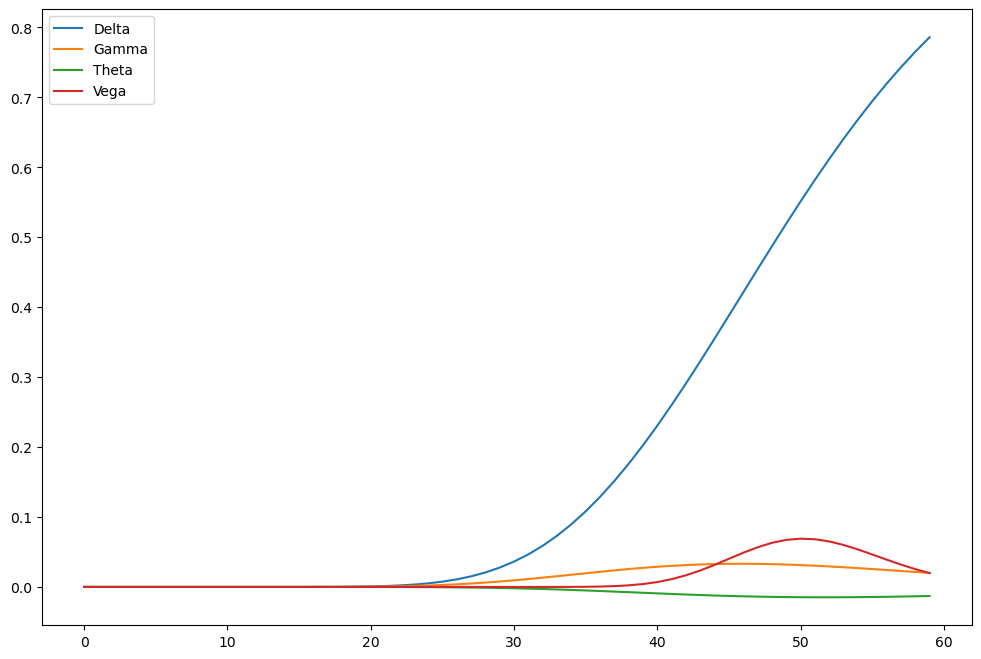

In [142]:
greeks[['Delta', 'Gamma', 'Theta', 'Vega']].plot(figsize=(12,8));
#plt.savefig('5104OS_08_54.png', bbox_inches='tight', dpi=300)